<a href="https://colab.research.google.com/github/DevyanshuKumar/Telecom-churn-analysis-data-exploration-/blob/main/Telecom_Churn_Analysis_Capstone_Project_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**Orange S.A. costumer churning**

In mordern world, for companies to sustain and grow, its not only important to attract new costumers but **retaining the customers is also equally important**.

The given data set has information of the customers switching/churning to other networks. Let us have a bird-eye view over the data first and then will help the Orange SA to figure out the key-factors resulting in the customer chrun.


In [ ]:
# importing the necessaray modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/ALma_Better/CAPSTONE_PROJECT/Telecom Churn.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# display the the first 15 rows of data set
df.head(15)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


# **Exploring the given data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.shape

(3333, 20)

In [ ]:
# understanding the data better
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

**Inferences from given data:**
1. Data is from **51 different states of USA**
2. Account length of customer has 212 unique entries. Where **account length refers to the number of the days account has been active**.
3. Data pertains to *3 locations as per the Area code*.
4. Data **includes both the customers who have and have not opted for International Calling plans**.
5. Data also includes both types of customers who are and are not using *Voice mails*.
6. Data has details of *number of time voice mails* facilities has been used by the customer.
7. Data also includes detailed calling information of customers in terms of total calling minutes (durning days or night or in International-calls), *charges* etc.
8. Data also includes the **Churn-Status** of the customers.

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df_churned=df[df['Churn']==True]
df_churned

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


**Key take aways from data:**
- Shape: **(20,3333)**; data-set has 20 columns (/key-features/information)
- Data includes **all 3333 non-zero rows**(/entries)
- **483 out of 3333** customers have churned. [This can also be easily seen in the following pie-chart.] 

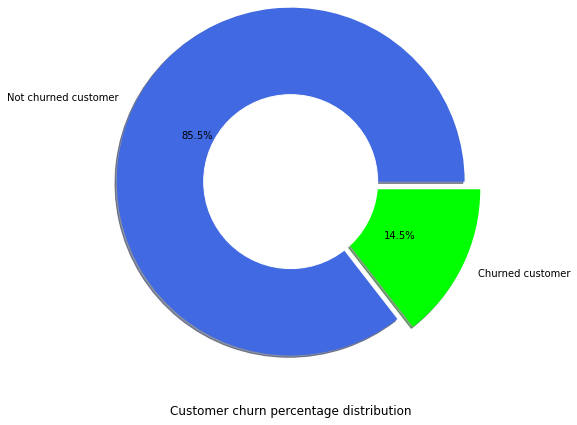

In [ ]:
numb_of_Churned_Customers = len(df_churned)
#numb_of_Churned_Customers
numb_of_not_Churned = len(df)-len(df_churned)
#numb_of_not_Churned

explode = (0, 0.2)
plt.pie((df["Churn"].value_counts()), explode = explode, autopct = '%1.1f%%', shadow=True, radius =2.0, labels = ['Not churned customer','Churned customer'],colors=['royalblue','lime'])
circle=plt.Circle((0,0), 1, color ='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.title ("Customer churn percentage distribution",y=-0.6)
plt.show()
#plt.pie




From the chart it's clear that nearly *14.5 %age (483 out of 3333) of the customers have switched their network to some other service providers which is clearly not a good sign for SA Orange*.

So, for discovering the key factors responsible for 14.49% churn in customers, let us consider all the feature informatiion provided in the data set and 
compare its effects on the churn.



**Dominant factors affecting Churn**

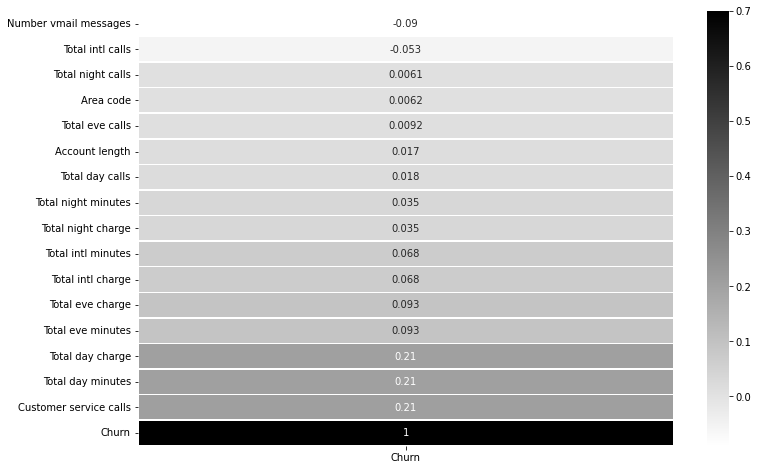

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr()
corr=corr[["Churn"]]

corr=corr.sort_values("Churn",ascending=True)
#print(corr)

mask = np.triu(np.ones_like(corr, dtype=bool))
#sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
sns.heatmap(corr, cmap='binary',linewidth=.5,annot=True, vmax = .7)
plt.show()

It can be seen from the above heatmap that:
- **Customer service call**
- **Total day minutes**
- **Total day charge**

**are highly influencing the churn [correlation coefficient > 0.2].**

So, in this project we have considered all the above three factors mainly, along with factors affecting churn like: States, International calling, Voice mail messaging etc.

# **1. States (/Regional Network) effects on churn:**

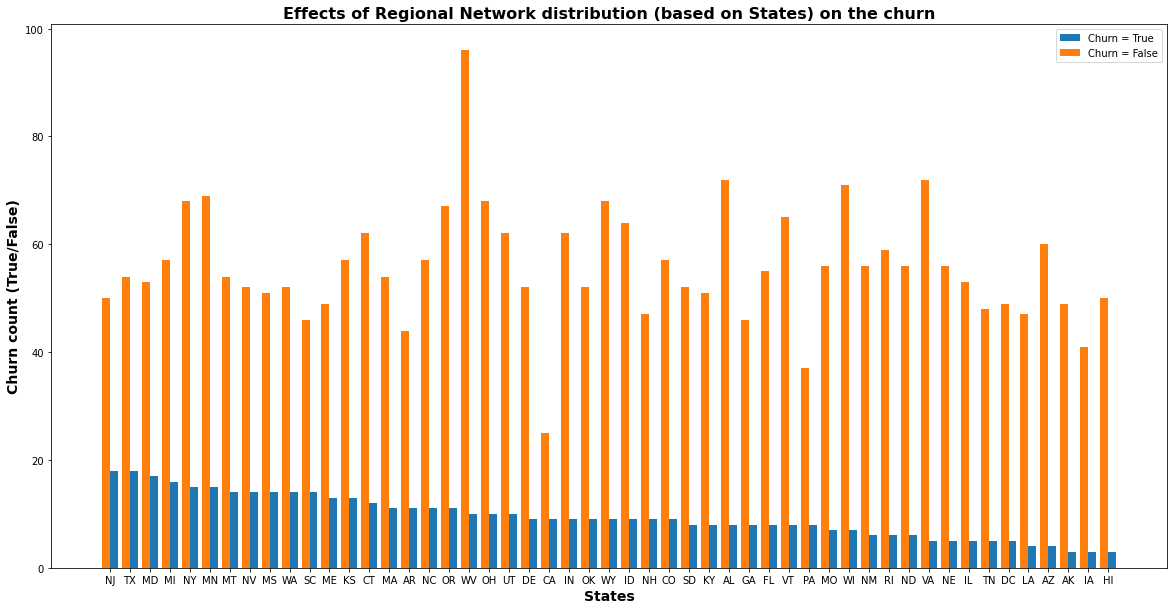

In [ ]:
df_notChurned = df[df['Churn'] == False]
#print(df_notChurned.head())
#print(df_notChurned['State'].value_counts())
#print(df_churned['State'].value_counts())


fig=plt.figure(figsize = (20, 10))
plt.bar(df_churned['State'].value_counts().index,df_churned['State'].value_counts(),align='edge',label='Churn = True',width=+0.4)
plt.bar(df_notChurned['State'].value_counts().index,df_notChurned['State'].value_counts(),label='Churn = False',align='edge',width=-0.4)

plt.title('Effects of Regional Network distribution (based on States) on the churn', fontweight ='bold', fontsize = 16)
plt.xlabel('States', fontweight ='bold', fontsize = 14)
plt.ylabel('Churn count (True/False)', fontweight ='bold', fontsize = 14)

plt.legend()
plt.show()


It's clear from the above plot (bar-chart) that the states: 
- New Jersey (NJ)
- Texas
- Mary Land (MD)
- Michigan
- New York
- Minnesota (MN)

are having high churn count (above 15). This may be due to insuffcient network coverage or high network traffic.

**Thus, for these states Network upgradation is required**

**Percentage-wise distribution of churn in different states**

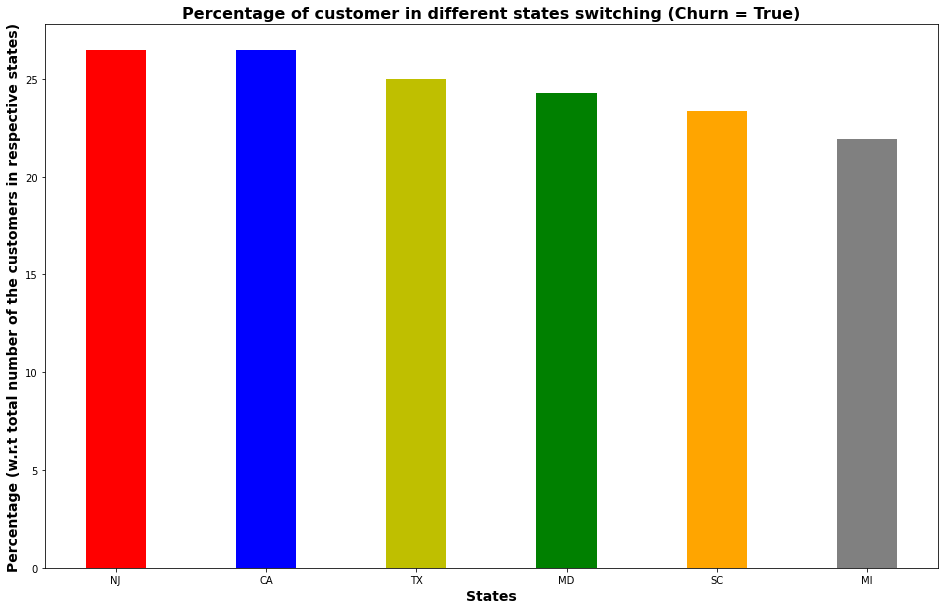

In [ ]:
percent_state_churn=(df_churned['State'].value_counts()/df['State'].value_counts())
percent_state_churn=percent_state_churn.sort_values(ascending=False)
#print(percent_state_churn*100)
#print(percent_state_churn.index)
#print(percent_state_churn.values)

fig=plt.figure(figsize = (16, 10))
plt.bar(percent_state_churn[0:6].index,percent_state_churn[0:6].values*100,width=+0.4,color=['Red','blue','y','green','orange','grey'])


plt.title('Percentage of customer in different states switching (Churn = True)', fontweight ='bold', fontsize = 16)
plt.xlabel('States', fontweight ='bold', fontsize = 14)
plt.ylabel('Percentage (w.r.t total number of the customers in respective states)', fontweight ='bold', fontsize = 14)

plt.show()




Also from the percentage wise distribution:
*   New Jersey (NJ)
*   California
*   Texas
*   Mary Land (MD)
*   South Carolina (SC)
*   Michigan

are having high churn percentage rate (~25%). This may be due to insuffcient network coverage or high network traffic.

**Thus, for these states Network upgradation is required**

# **2. International-Plan service's effects on the churn**

**Customers opting for International-Plans**

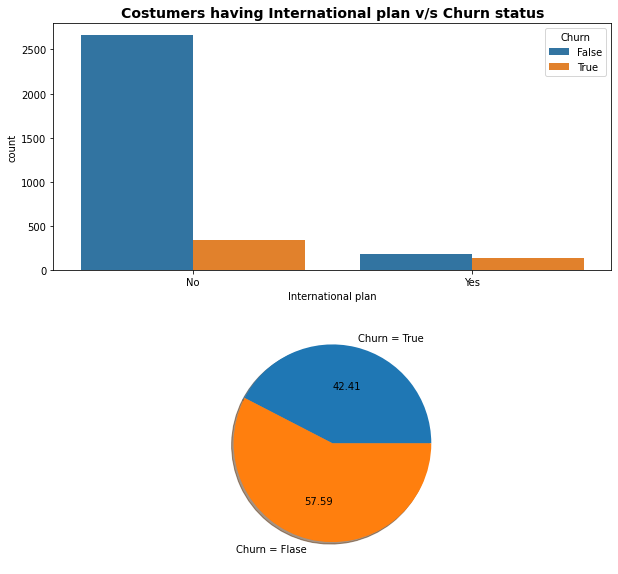

In [ ]:
#Coustomers having International Plans but have not-churned
series_Int_plan_not_Churned = (df_notChurned[df_notChurned['International plan'] == 'Yes']['International plan'])
#print(series_Int_plan_not_Churned.value_counts())

#Coustomers having International Plans but have churned
series_Int_plan_Churned = (df_churned[df_churned['International plan'] == 'Yes']['International plan'])
#print(len(series_Int_plan_Churned))

fig=plt.figure(figsize = (10,10))
plt.subplot(211)


plt.title("Costumers having International plan v/s Churn status",fontweight ='bold', fontsize = 14)


sns.countplot(x='International plan',hue="Churn", data=df)

plt.subplot(212)
plt.pie([len(series_Int_plan_Churned),len(series_Int_plan_not_Churned)],labels=['Churn = True ','Churn = Flase'],shadow=True,autopct = '%.2f')
plt.show()

From the above figures it is evident that the rate of churn is very high for customers with International plan services. 

**42.41 %age of the total customers with International calling facilities are switching the network.**

This is a clear indication towards the need of improvement in International plans. **Which can be achieved by reducing the International plans' pricing rates and by improving the International calling quality with help of advanced technologies like VoLTE.**

# **3. Number of Voicemail messages v/s Chrun** 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


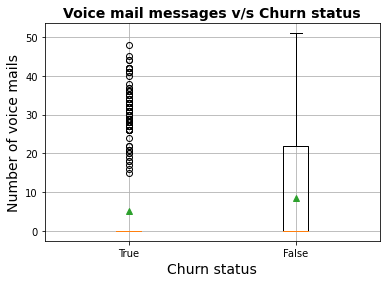

In [ ]:
#
numb_Vmail_churned = df_churned['Number vmail messages']
numb_Vmail_notChurned = df_notChurned['Number vmail messages']


plt.boxplot([numb_Vmail_churned,numb_Vmail_notChurned],showbox=True,labels=["True","False"],showmeans=True)
plt.title("Voice mail messages v/s Churn status",fontweight ='bold', fontsize = 14)
plt.xlabel('Churn status', fontsize = 14)
plt.ylabel('Number of voice mails', fontsize = 14)
plt.grid()
plt.show()



From the above figure it is clear that ***when the number of Voice messages are greater than 15, there is very high chance for the churn.***

**This can resolved by revising Voice message plans and improving voice mail technologies.**

# **4. Total day-minutes of calls' effect on churn**

let us now understand the effects of taotal day-minutes on churn based on the data set provided.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


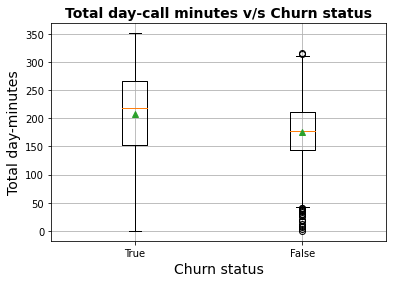

In [ ]:
total_dayMinutes_churned = df_churned['Total day minutes']
total_dayMinutes_notChurned = df_notChurned['Total day minutes']


plt.boxplot([total_dayMinutes_churned,total_dayMinutes_notChurned],showbox=True,labels=["True","False"],showmeans=True)
plt.title("Total day-call minutes v/s Churn status",fontweight ='bold', fontsize = 14)
plt.xlabel('Churn status', fontsize = 14)
plt.ylabel('Total day-minutes', fontsize = 14)
plt.grid()
plt.show()

It is evident from the above figure that the *people with total day-calling minutes greater than 225 (approx.) are switching their network*. 

**Solution to this can be:**
- Better voice calling quality: by adopting newer technologies like VoLTE etc.
- Especial pricing rate/plans for customers, calling for more number of hours(/minutes).
- Network upgradation to avoid unnecessary traffic and noise.



# **5. Total number of day-calls' effect on churn**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


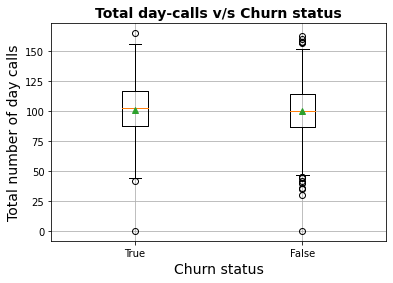

In [ ]:
total_dayCalls_churned = df_churned['Total day calls']
total_dayCalls_notChurned = df_notChurned['Total day calls']


plt.boxplot([total_dayCalls_churned,total_dayCalls_notChurned],showbox=True,labels=["True","False"],showmeans=True)
plt.title("Total day-calls v/s Churn status",fontweight ='bold', fontsize = 14)
plt.xlabel('Churn status', fontsize = 14)
plt.ylabel('Total number of day calls', fontsize = 14)
plt.grid()
plt.show()

It can be easily infered that the average(/or median) calls are nearly 100. But it's also worth noting the chruned customers' median is greater than 100 (marginally though), indicating the customers might be facing higher call drops and hence, rising the unsatifaction level which ultimately is leading to churning. 

Solution:
- **Better network coverage is required with higher signal strength.**

# **6. Effects of Total day-call charges on churn**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


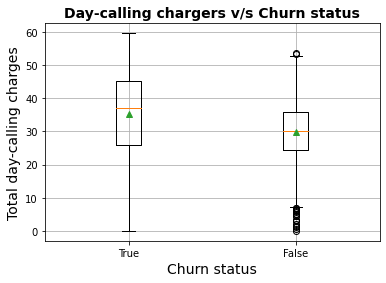

In [ ]:
total_dayCharges_churned = df_churned['Total day charge']
total_dayCharges_notChurned = df_notChurned['Total day charge']


plt.boxplot([total_dayCharges_churned,total_dayCharges_notChurned],showbox=True,labels=["True","False"],showmeans=True)
plt.title("Day-calling chargers v/s Churn status",fontweight ='bold', fontsize = 14)
plt.xlabel('Churn status', fontsize = 14)
plt.ylabel('Total day-calling charges', fontsize = 14)
plt.grid()
plt.show()

It can be seen that customers are switching the network when then are paying higher sum of money (median = 35$).

Solution:
- **Pricing strategy should be changed such that calls rates should be discounted for customers who are using the network for more number of hours.**

# **7. Effect of Total number of International calls on churn**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


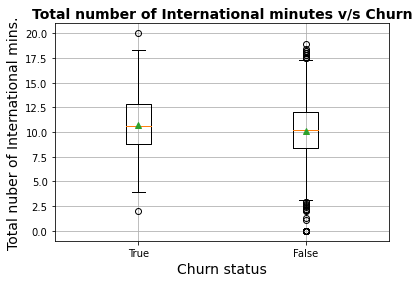

In [ ]:
total_InterNationalMinutes_churned = df_churned['Total intl minutes']
total_InterNationalMinutes_notChurned = df_notChurned['Total intl minutes']


plt.boxplot([total_InterNationalMinutes_churned,total_InterNationalMinutes_notChurned],showbox=True,labels=["True","False"],showmeans=True)
plt.title("Total number of International minutes v/s Churn",fontweight ='bold', fontsize = 14)
plt.xlabel('Churn status', fontsize = 14)
plt.ylabel('Total nuber of International mins.', fontsize = 14)
plt.grid()
plt.show()

Customers tending to make more International calls are switching to other network.

Solution:
- International calling service needs to be improved by using better cummunication technologies.

# **8. Effects of Total International calling' charges on churn**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


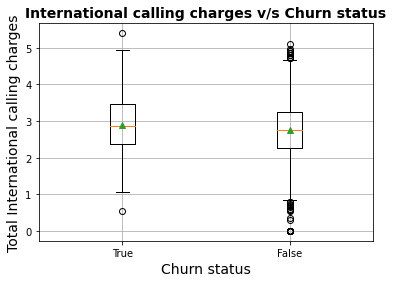

In [ ]:
total_InternationalCharges_churned = df_churned['Total intl charge']
total_InternationalCharges_notChurned = df_notChurned['Total intl charge']


plt.boxplot([total_InternationalCharges_churned,total_InternationalCharges_notChurned],showbox=True,labels=["True","False"],showmeans=True)
plt.title("International calling charges v/s Churn status",fontweight ='bold', fontsize = 14)
plt.xlabel('Churn status', fontsize = 14)
plt.ylabel('Total International calling charges', fontsize = 14)
plt.grid()
plt.show()

Better interncational calling plans are required and rate optimization techniques.

# **9. Role of customer support on churn**

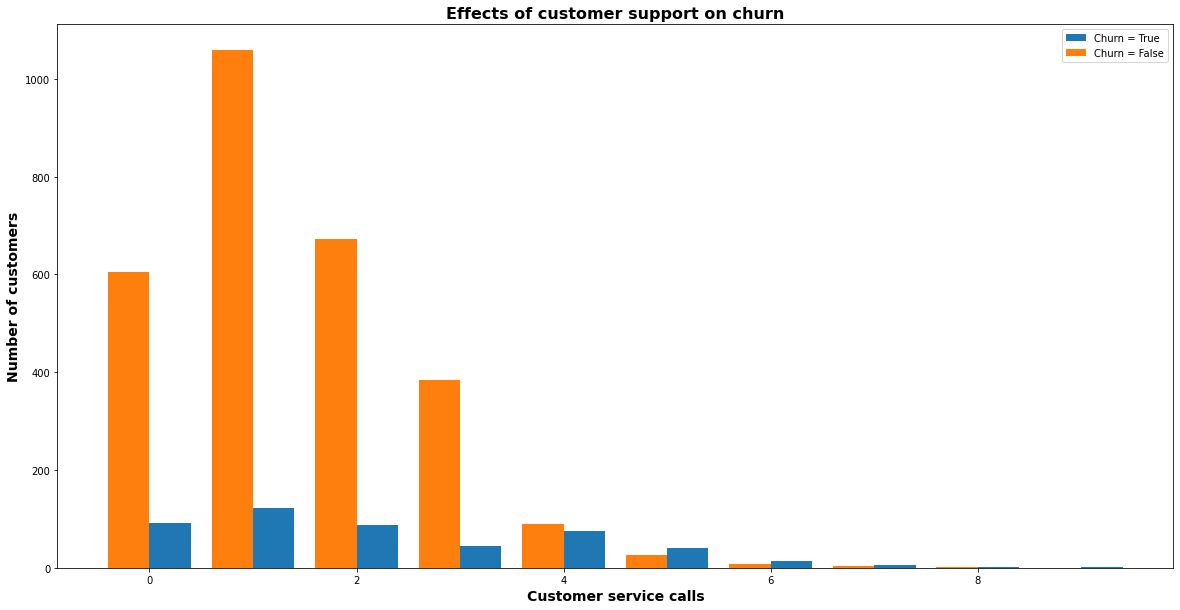

In [ ]:
fig=plt.figure(figsize = (20, 10))
plt.bar(df_churned['Customer service calls'].value_counts().index,df_churned['Customer service calls'].value_counts(),align='edge',label='Churn = True',width=0.4)
plt.bar(df_notChurned['Customer service calls'].value_counts().index,df_notChurned['Customer service calls'].value_counts(),label='Churn = False',align='edge',width=-0.4)

plt.title('Effects of customer support on churn', fontweight ='bold', fontsize = 16)
plt.xlabel('Customer service calls', fontweight ='bold', fontsize = 14)
plt.ylabel('Number of customers', fontweight ='bold', fontsize = 14)

plt.legend()
plt.show()

It can be seen that there are many customers who are switching directly without even calling to customer support, for them nothing  much can be done. But its also visible that customers calling for more than 5 times are showing high churn. Indicating that their issues were not resolved.

Solution:

**Improvement in customer support is required, by proper management and clear communication with customer.**